# Rf 2 0 9_Anaconv
Addition and convolution: decay function p.d.fs with optional B physics effects (mixing and CP violation) that can be analytically convolved with e.g. Gaussian resolution functions

pdf1 = decay(t,tau) (x) delta(t)
pdf2 = decay(t,tau) (x) gauss(t,m,s)
pdf3 = decay(t,tau) (x) (f*gauss1(t,m1,s1) + (1-f)*gauss2(t,m1,s1))




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:45 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


B-physics pdf with truth resolution
---------------------------------------------------------------------

Variables of decay p.d.f.

In [2]:
dt = ROOT.RooRealVar("dt", "dt", -10, 10)
tau = ROOT.RooRealVar("tau", "tau", 1.548)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Build a truth resolution model (delta function)

In [3]:
tm = ROOT.RooTruthModel("tm", "truth model", dt)

Construct decay(t) (x) delta(t)

In [4]:
decay_tm = ROOT.RooDecay("decay_tm", "decay", dt,
                         tau, tm, ROOT.RooDecay.DoubleSided)

Plot p.d.f. (dashed)

In [5]:
frame = dt.frame(ROOT.RooFit.Title("Bdecay (x) resolution"))
decay_tm.plotOn(frame, ROOT.RooFit.LineStyle(ROOT.kDashed))

<ROOT.RooPlot object ("frame_dt_5598ac513d20") at 0x5598ac513d20>

B-physics pdf with Gaussian resolution
----------------------------------------------------------------------------

Build a gaussian resolution model

In [6]:
bias1 = ROOT.RooRealVar("bias1", "bias1", 0)
sigma1 = ROOT.RooRealVar("sigma1", "sigma1", 1)
gm1 = ROOT.RooGaussModel("gm1", "gauss model 1", dt, bias1, sigma1)

Construct decay(t) (x) gauss1(t)

In [7]:
decay_gm1 = ROOT.RooDecay("decay_gm1", "decay",
                          dt, tau, gm1, ROOT.RooDecay.DoubleSided)

Plot p.d.f.

In [8]:
decay_gm1.plotOn(frame)

<ROOT.RooPlot object ("frame_dt_5598ac513d20") at 0x5598ac513d20>

B-physics pdf with double Gaussian resolution
------------------------------------------------------------------------------------------

Build another gaussian resolution model

In [9]:
bias2 = ROOT.RooRealVar("bias2", "bias2", 0)
sigma2 = ROOT.RooRealVar("sigma2", "sigma2", 5)
gm2 = ROOT.RooGaussModel("gm2", "gauss model 2", dt, bias2, sigma2)

Build a composite resolution model f*gm1+(1-f)*gm2

In [10]:
gm1frac = ROOT.RooRealVar("gm1frac", "fraction of gm1", 0.5)
gmsum = ROOT.RooAddModel(
    "gmsum",
    "sum of gm1 and gm2",
    ROOT.RooArgList(
        gm1,
        gm2),
    ROOT.RooArgList(gm1frac))

Construct decay(t) (x) (f*gm1 + (1-f)*gm2)

In [11]:
decay_gmsum = ROOT.RooDecay(
    "decay_gmsum", "decay", dt, tau, gmsum, ROOT.RooDecay.DoubleSided)

Plot p.d.f. (red)

In [12]:
decay_gmsum.plotOn(frame, ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_dt_5598ac513d20") at 0x5598ac513d20>

Draw all frames on canvas

In [13]:
c = ROOT.TCanvas("rf209_anaconv", "rf209_anaconv", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf209_anaconv.png")

Info in <TCanvas::Print>: png file rf209_anaconv.png has been created


Draw all canvases 

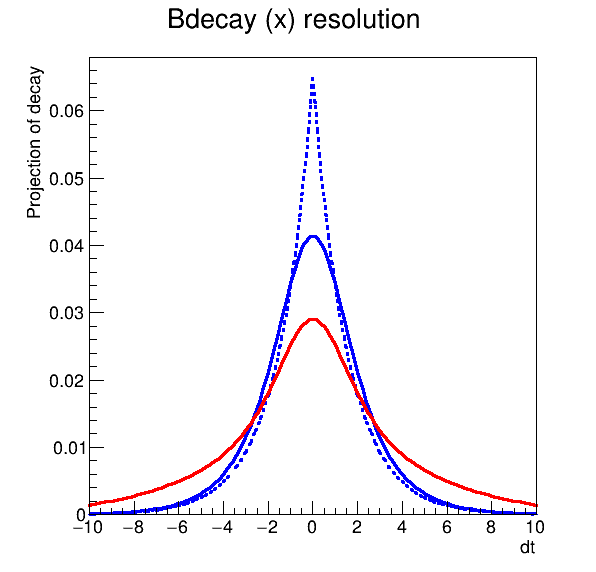

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()